<a href="https://colab.research.google.com/github/christophersingh/Master/blob/main/Time_Series_After_Super_Bowl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use("fivethirtyeight")

df = pd.read_csv('https://github.com/christophersingh/Times-Series-Analysis-For-Milk-Production/blob/master/data/monthly_milk_production.csv?raw=true')
df['Date'] = pd.to_datetime(df['Month'])
df['Temp'] = df['Production']
df.drop(['Production', 'Month'], axis=1, inplace=True)
df = df.set_index('Date')
df.sort_index(inplace=True)
y = df['Temp']
df

,Temp
Date,
1962-01-01,578.3
1962-02-01,609.8
1962-03-01,628.4
1962-04-01,665.6
1962-05-01,713.8
...,...
1974-08-01,851.3
1974-09-01,826.9
1974-10-01,797.3


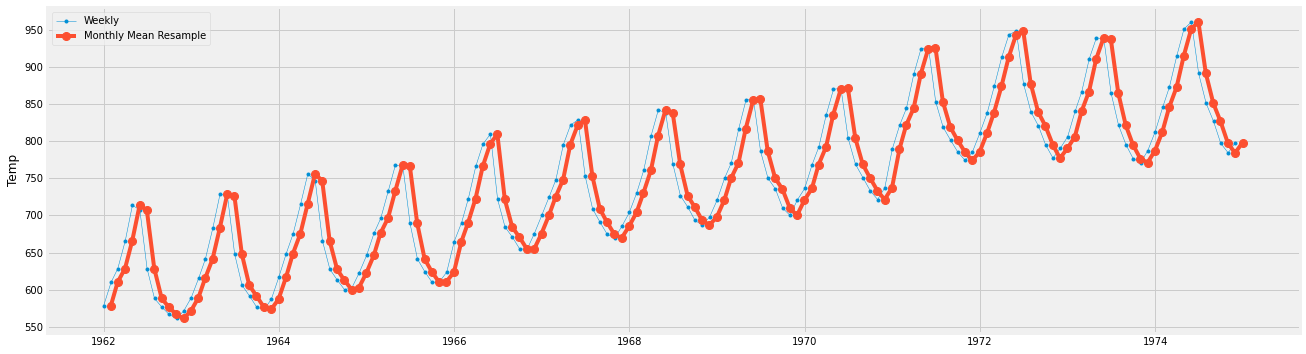

In [2]:
import warnings
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(y,marker='.', linestyle='-', linewidth=0.5, label='Weekly')
ax.plot(y.resample('M').mean(),marker='o', markersize=8, linestyle='-', label='Monthly Mean Resample')
ax.set_ylabel('Temp')
ax.legend();
pass;

In [3]:
y

Date
1962-01-01    578.3
1962-02-01    609.8
1962-03-01    628.4
1962-04-01    665.6
1962-05-01    713.8
              ...  
1974-08-01    851.3
1974-09-01    826.9
1974-10-01    797.3
1974-11-01    784.3
1974-12-01    798.2
Name: Temp, Length: 156, dtype: float64

In [4]:
import statsmodels.api as sm

# graphs to show seasonal_decompose
def seasonal_decompose (y):
    decomposition = sm.tsa.seasonal_decompose(y, model='additive',extrapolate_trend='freq', freq=52)
    fig = decomposition.plot()
    fig.set_size_inches(14,7)
    plt.show()
    pass;

seasonal_decompose(y)

TypeError: ignored

In [ ]:
# Augmented Dickey-Fuller Test
from statsmodels.tsa.stattools import adfuller

def ADF_test(timeseries, dataDesc):
    print(' > Is the {} stationary ?'.format(dataDesc))
    dftest = adfuller(timeseries.dropna(), autolag='AIC')
    print('Test statistic = {:.3f}'.format(dftest[0]))
    print('P-value = {:.3f}'.format(dftest[1]))
    print('Critical values :')
    for k, v in dftest[4].items():
        print('\t{}: {} - The data is {} stationary with {}% confidence'.format(k, v, 'not' if v<dftest[0] else '', 100-int(k[:-1])))

In [ ]:
### plot for Rolling Statistic for testing Stationarity
def test_stationarity(timeseries, title):
    
    #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=12).mean() 
    rolstd = pd.Series(timeseries).rolling(window=12).std()
    
    fig, ax = plt.subplots(figsize=(16, 4))
    ax.plot(timeseries, label= title)
    ax.plot(rolmean, label='rolling mean');
    ax.plot(rolstd, label='rolling std (x10)');
    ax.legend()
    pass;

pd.options.display.float_format = '{:.8f}'.format
test_stationarity(y,'raw data')
pass;

In [ ]:
ADF_test(y,'raw data')

In [5]:
#Detrending
y_detrend =  (y - y.rolling(window=12).mean())/y.rolling(window=12).std()

test_stationarity(y_detrend,'de-trended data')
ADF_test(y_detrend,'de-trended data')

NameError: ignored

In [ ]:
# Differencing
y_12lag =  y - y.shift(12)

test_stationarity(y_12lag,'12 lag differenced data')
ADF_test(y_12lag,'12 lag differenced data')

In [6]:
# Detrending + Differencing

y_12lag_detrend =  y_detrend - y_detrend.shift(12)

test_stationarity(y_12lag_detrend,'12 lag differenced de-trended data')
ADF_test(y_12lag_detrend,'12 lag differenced de-trended data')

NameError: ignored

In [7]:
y_12lag_detrend.dropna(inplace=True)
y_12lag_detrend

Date
1963-12-01    0.054605
1964-01-01    0.230098
1964-02-01    0.284547
1964-03-01    0.248658
1964-04-01    0.130567
                ...   
1974-08-01    0.435366
1974-09-01    0.422323
1974-10-01    0.172085
1974-11-01   -0.011887
1974-12-01   -0.093906
Name: Temp, Length: 133, dtype: float64

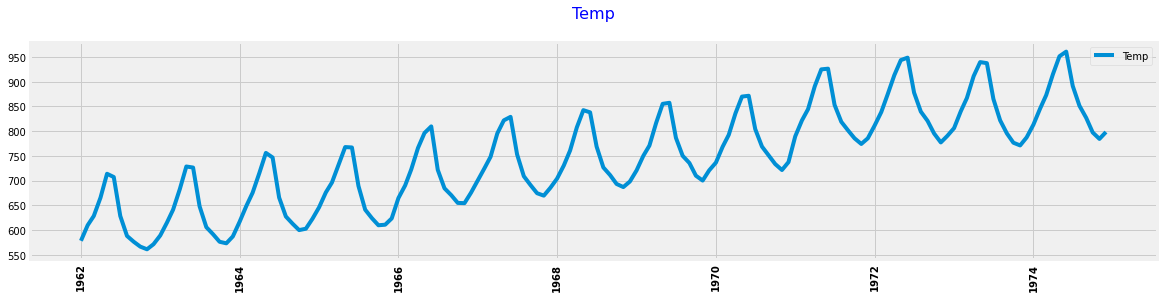

In [8]:
plt.figure(figsize=(18,4))
plt.plot(df, label='Temp')
plt.legend(loc='best')
plt.title('Temp\n', fontdict={'fontsize': 16, 'fontweight' : 5, 'color' : 'Blue'})
plt.xticks(rotation = 90,fontweight="bold")
plt.show()

In [9]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(df.Temp, model='additive', freq=52) # additive seasonal index
fig = decomposition.plot()
plt.show()

TypeError: ignored

In [10]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(df.Temp, model='multiplicative', freq=52) # additive seasonal index
fig = decomposition.plot()
plt.show()

TypeError: ignored

In [15]:
train_len = 102
train = df[0 : train_len]
test = df[train_len : ]

In [16]:
train

,Temp
Date,
1962-01-01,578.30000000
1962-02-01,609.80000000
1962-03-01,628.40000000
1962-04-01,665.60000000
1962-05-01,713.80000000
...,...
1970-02-01,768.50000000
1970-03-01,792.40000000
1970-04-01,836.00000000


In [17]:
test

,Temp
Date,
1970-07-01,804.10000000
1970-08-01,768.80000000
1970-09-01,750.80000000
1970-10-01,733.40000000
1970-11-01,721.40000000
1970-12-01,737.40000000
1971-01-01,789.40000000
1971-02-01,821.80000000
1971-03-01,844.40000000


Simple Time Series Naive Method

In [18]:
y_hat_naive = test.copy()
y_hat_naive['naive_forecast'] = train['Temp'][train_len-1]

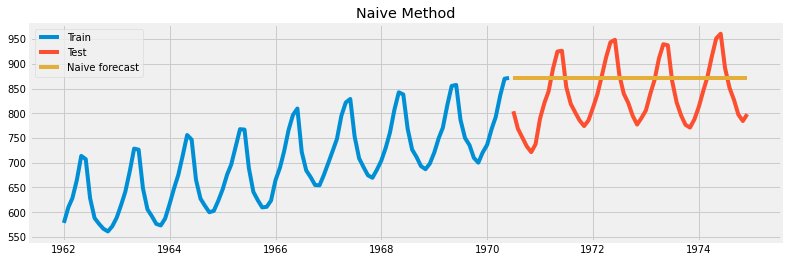

In [19]:
plt.figure(figsize=(12,4))
plt.plot(train['Temp'], label='Train')
plt.plot(test['Temp'], label='Test')
plt.plot(y_hat_naive['naive_forecast'], label='Naive forecast')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

In [20]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

rmse = np.sqrt(mean_squared_error(test['Temp'], y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Temp']-y_hat_naive['naive_forecast'])/test['Temp'])*100,2)
r2 = r2_score(test['Temp'], y_hat_naive['naive_forecast'])

results = pd.DataFrame({'Method':['Naive method'], 'R2': r2, 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'R2', 'RMSE', 'MAPE']]
results

,Method,R2,RMSE,MAPE
0,Naive method,-0.31293187,70.99000000,7.62000000


Simple Average Method

In [21]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Temp'].mean()

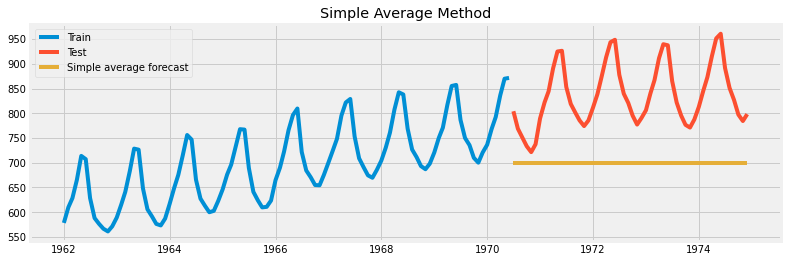

In [22]:
plt.figure(figsize=(12,4))
plt.plot(train['Temp'], label='Train')
plt.plot(test['Temp'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Simple average forecast')
plt.legend(loc='best')
plt.title('Simple Average Method')
plt.show()

In [23]:
rmse = np.sqrt(mean_squared_error(test['Temp'], y_hat_avg['avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Temp']-y_hat_avg['avg_forecast'])/test['Temp'])*100,2)
r2 = r2_score(test['Temp'], y_hat_avg['avg_forecast'])

tempResults = pd.DataFrame({'Method':['Simple average method'], 'R2': r2, 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'R2', 'RMSE', 'MAPE']]
results

,Method,R2,RMSE,MAPE
0,Naive method,-0.31293187,70.99000000,7.62000000
0,Simple average method,-4.97401973,151.44000000,16.06000000


Simple Moving Average Method

In [24]:
y_hat_sma = df.copy()
ma_window = 12
y_hat_sma['sma_forecast'] = df['Temp'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

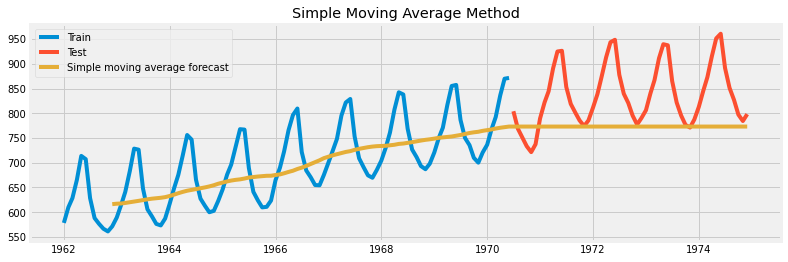

In [25]:
# Plot train, test and forecast

plt.figure(figsize=(12,4))
plt.plot(train['Temp'], label='Train')
plt.plot(test['Temp'], label='Test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

In [26]:
rmse = np.sqrt(mean_squared_error(test['Temp'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['Temp']-y_hat_sma['sma_forecast'][train_len:])/test['Temp'])*100,2)
r2 = r2_score(test['Temp'], y_hat_sma['sma_forecast'][train_len:])

tempResults = pd.DataFrame({'Method':['Simple moving average forecast'], 'R2': r2, 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'R2', 'RMSE', 'MAPE']]
results

,Method,R2,RMSE,MAPE
0,Naive method,-0.31293187,70.99000000,7.62000000
0,Simple average method,-4.97401973,151.44000000,16.06000000
0,Simple moving average forecast,-1.05728264,88.87000000,7.90000000


Exponential Smoothing Techniques

Simple exponential smoothing


In [27]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train['Temp'])
model_fit = model.fit(optimized=True)
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(len(test))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


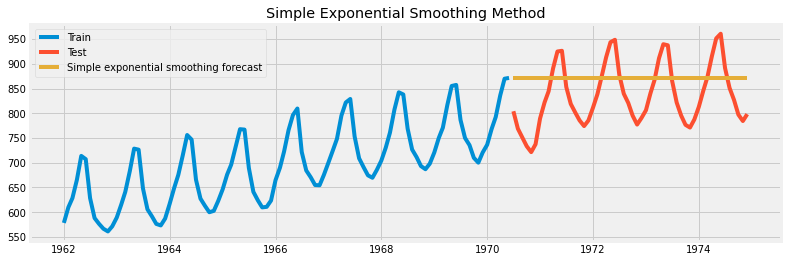

In [28]:
plt.figure(figsize=(12,4))
plt.plot(train['Temp'], label='Train')
plt.plot(test['Temp'], label='Test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Method')
plt.show()

In [29]:
rmse = np.sqrt(mean_squared_error(test['Temp'], y_hat_ses['ses_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Temp']-y_hat_ses['ses_forecast'])/test['Temp'])*100,2)
r2 = r2_score(test['Temp'], y_hat_ses['ses_forecast'])
tempResults = pd.DataFrame({'Method':['Simple exponential smoothing forecast'], 'R2': r2, 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results

,Method,R2,RMSE,MAPE
0,Naive method,-0.31293187,70.99000000,7.62000000
0,Simple average method,-4.97401973,151.44000000,16.06000000
0,Simple moving average forecast,-1.05728264,88.87000000,7.90000000
0,Simple exponential smoothing forecast,-0.31293187,70.99000000,7.62000000


Holt's Winter With Trend

In [30]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train['Temp']) ,seasonal_periods=12 ,trend='additive', seasonal=None)
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 1.0, 'smoothing_slope': 0.9999999951582615, 'smoothing_seasonal': nan, 'damping_slope': nan, 'initial_level': 550.5317568326301, 'initial_slope': 24.557976033272972, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


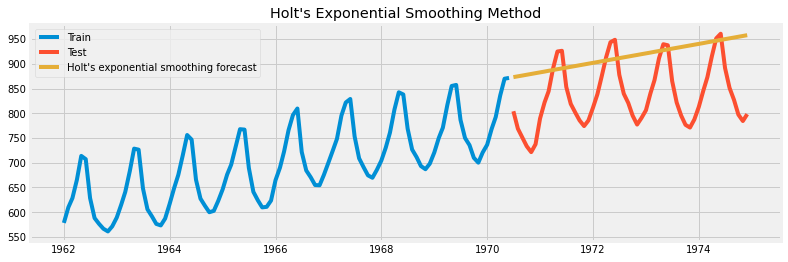

In [31]:
plt.figure(figsize=(12,4))
plt.plot( train['Temp'], label='Train')
plt.plot(test['Temp'], label='Test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method')
plt.show()

In [32]:
# Calculate RMSE and MAPE

rmse = np.sqrt(mean_squared_error(test['Temp'], y_hat_holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Temp']-y_hat_holt['holt_forecast'])/test['Temp'])*100,2)
r2 = r2_score(test['Temp'], y_hat_holt['holt_forecast'])

tempResults = pd.DataFrame({'Method':['Holt\'s exponential smoothing method'], 'R2': r2, 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'R2', 'RMSE', 'MAPE']]
results

,Method,R2,RMSE,MAPE
0,Naive method,-0.31293187,70.99000000,7.62000000
0,Simple average method,-4.97401973,151.44000000,16.06000000
0,Simple moving average forecast,-1.05728264,88.87000000,7.90000000
0,Simple exponential smoothing forecast,-0.31293187,70.99000000,7.62000000
0,Holt's exponential smoothing method,-1.56110686,99.15000000,10.69000000


Holt's Winter Additive With Trend and Seasonality

In [33]:
y_hat_hwa = test.copy()
model = ExponentialSmoothing(np.asarray(train['Temp']) ,seasonal_periods=12 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['hw_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.2631578923957336, 'smoothing_slope': 0.04394822231776811, 'smoothing_seasonal': 0.7368421029220494, 'damping_slope': nan, 'initial_level': 651.7582442130034, 'initial_slope': 0.9875226594000187, 'initial_seasons': array([ -80.60164355,  -50.3445532 ,  -32.20510741,    3.93176009,
         50.86326659,   43.80475309,  -35.63086663,  -76.40981719,
        -88.38785374,  -97.94499478, -102.31500874,  -91.21853341]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


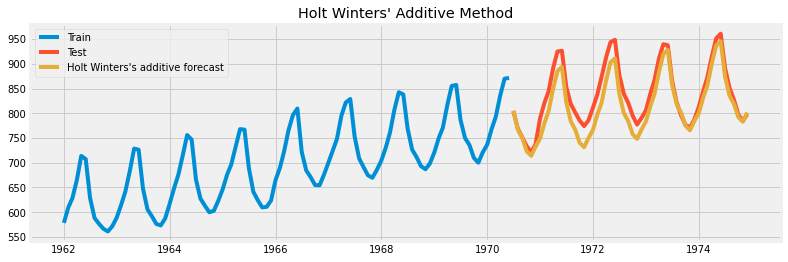

In [34]:
plt.figure(figsize=(12,4))
plt.plot( train['Temp'], label='Train')
plt.plot(test['Temp'], label='Test')
plt.plot(y_hat_hwa['hw_forecast'], label='Holt Winters\'s additive forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Additive Method')
plt.show()

In [35]:
rmse = np.sqrt(mean_squared_error(test['Temp'], y_hat_hwa['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Temp']-y_hat_hwa['hw_forecast'])/test['Temp'])*100,2)
r2 = r2_score(test['Temp'], y_hat_hwa['hw_forecast'])

tempResults = pd.DataFrame({'Method':['Holt Winters\' additive method'], 'R2': r2, 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'R2', 'RMSE', 'MAPE']]
results

,Method,R2,RMSE,MAPE
0,Naive method,-0.31293187,70.99000000,7.62000000
0,Simple average method,-4.97401973,151.44000000,16.06000000
0,Simple moving average forecast,-1.05728264,88.87000000,7.90000000
0,Simple exponential smoothing forecast,-0.31293187,70.99000000,7.62000000
0,Holt's exponential smoothing method,-1.56110686,99.15000000,10.69000000
0,Holt Winters' additive method,0.79740755,27.89000000,2.74000000


Holt Winter's multiplicative method with trend and seasonality


In [36]:
y_hat_hwm = test.copy()
model = ExponentialSmoothing(np.asarray(train['Temp']) ,seasonal_periods=12 ,trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwm['hw_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.6315789473283102, 'smoothing_slope': 0.05263156075035605, 'smoothing_seasonal': 0.3684210525914681, 'damping_slope': nan, 'initial_level': 661.7777696585422, 'initial_slope': 1.1826384799994942, 'initial_seasons': array([0.88361923, 0.92593597, 0.95459387, 1.0066123 , 1.07479982,
       1.07243137, 0.95625925, 0.89081753, 0.86476794, 0.84344502,
       0.83698242, 0.85579299]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [37]:
# Calculate RMSE and MAPE

rmse = np.sqrt(mean_squared_error(test['Temp'], y_hat_hwm['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Temp']-y_hat_hwm['hw_forecast'])/test['Temp'])*100,2)
r2 = r2_score(test['Temp'], y_hat_hwm['hw_forecast'])

tempResults = pd.DataFrame({'Method':['Holt Winters\' multiplicative method'], 'R2': r2, 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'R2', 'RMSE', 'MAPE']]
results

,Method,R2,RMSE,MAPE
0,Naive method,-0.31293187,70.99000000,7.62000000
0,Simple average method,-4.97401973,151.44000000,16.06000000
0,Simple moving average forecast,-1.05728264,88.87000000,7.90000000
0,Simple exponential smoothing forecast,-0.31293187,70.99000000,7.62000000
0,Holt's exponential smoothing method,-1.56110686,99.15000000,10.69000000
0,Holt Winters' additive method,0.79740755,27.89000000,2.74000000
0,Holt Winters' multiplicative method,0.29077555,52.18000000,6.02000000


**Conclusion: Holt Winters' additive method	is the best because it provided the lowest values**

In [38]:
print()

**Moving onto Auto Regressive Models**

Auto Regressive methods

Check whether the time series is stationary

Augmented Dickey-Fuller (ADF) test

In [39]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(df['Temp'])

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' %adf_test[1])

ADF Statistic: -1.177724
Critical Values @ 0.05: -2.88
p-value: 0.683104


Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test


In [40]:
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(df['Temp'])

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 1.092276
Critical Values @ 0.05: 0.46
p-value: 0.010000


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


To make the series stationary, we need to perform transformation and differencing.

Box Cox transformation to make variance constant

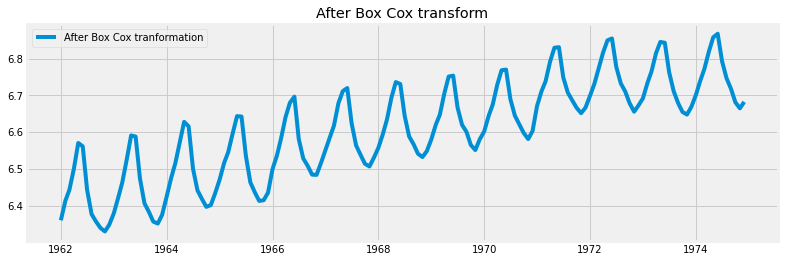

In [41]:
from scipy.stats import boxcox
data_boxcox = pd.Series(boxcox(df['Temp'], lmbda=0), index = df.index)

plt.figure(figsize=(12,4))
plt.plot(data_boxcox, label='After Box Cox tranformation')
plt.legend(loc='best')
plt.title('After Box Cox transform')
plt.show()

Differencing to remove trend


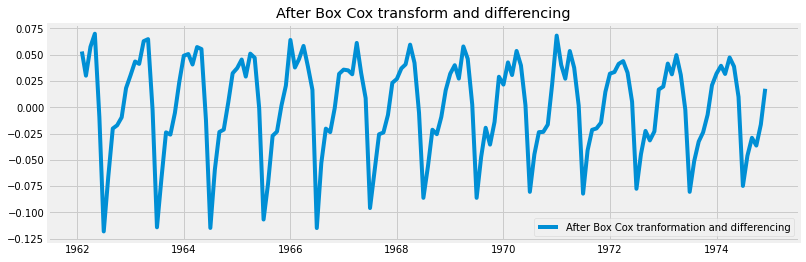

In [42]:
data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), df.index)
plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label='After Box Cox tranformation and differencing')
plt.legend(loc='best')
plt.title('After Box Cox transform and differencing')
plt.show()

In [43]:
data_boxcox_diff.dropna(inplace=True) # After shifting the data, drop the first value which is NA

Lets try to detrend

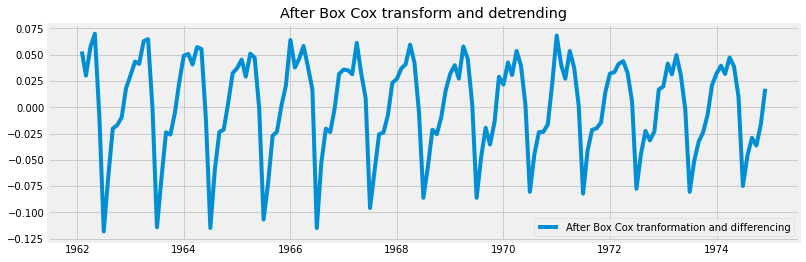

In [44]:
"""
(data_boxcox - data_boxcox.rolling(window=12).mean())/data_boxcox.rolling(window=12).std()
"""
data_boxcox_detrend = pd.Series((data_boxcox - data_boxcox.rolling(window=12).mean())/data_boxcox.rolling(window=12).std(), df.index)
plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label='After Box Cox tranformation and differencing')
plt.legend(loc='best')
plt.title('After Box Cox transform and detrending')
plt.show()

In [45]:
data_boxcox_detrend.dropna(inplace=True) # After shifting the data, drop the first value which is NA

In [46]:
data_boxcox_detrend

Date
1962-12-01   -0.84888789
1963-01-01   -0.51444644
1963-02-01   -0.00529737
1963-03-01    0.46225362
1963-04-01    1.14782723
                 ...    
1974-08-01    0.01464493
1974-09-01   -0.41446397
1974-10-01   -0.96199269
1974-11-01   -1.24321823
1974-12-01   -1.03030014
Length: 145, dtype: float64

In [47]:
y_detrend.dropna(inplace=True)
y_detrend

Date
1962-12-01   -0.83246824
1963-01-01   -0.52649351
1963-02-01   -0.04322016
1963-03-01    0.42056195
1963-04-01    1.13678262
                 ...    
1974-08-01   -0.02087877
1974-09-01   -0.43861439
1974-10-01   -0.95214481
1974-11-01   -1.20661664
1974-12-01   -1.01179345
Name: Temp, Length: 145, dtype: float64

In [48]:
data_boxcox_diff

Date
1962-02-01    0.05303827
1962-03-01    0.03004587
1962-04-01    0.05751198
1962-05-01    0.06991392
1962-06-01   -0.00928930
                 ...    
1974-08-01   -0.04614084
1974-09-01   -0.02908082
1974-10-01   -0.03645275
1974-11-01   -0.01643942
1974-12-01    0.01756759
Length: 155, dtype: float64

**  ** 
**Now let us see whether our series has become stationary.**

**Augmented Dickey-Fuller (ADF) test**

In [49]:
adf_test = adfuller(data_boxcox_diff)

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -2.791943
Critical Values @ 0.05: -2.88
p-value: 0.059434


In [50]:
kpss_test = kpss(data_boxcox_diff)

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.102302
Critical Values @ 0.05: 0.46
p-value: 0.100000


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [51]:
train_data_boxcox = data_boxcox[:train_len]
test_data_boxcox = data_boxcox[train_len:]
train_data_boxcox_diff = data_boxcox_diff[:train_len-1]
test_data_boxcox_diff = data_boxcox_diff[train_len-1:]

In [52]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train_data_boxcox_diff, order=(1, 0, 0)) 
model_fit = model.fit()
print(model_fit.params)

const     0.00482114
ar.L1.y   0.62937430
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [53]:
# Recover original time series

y_hat_ar = data_boxcox_diff.copy()
y_hat_ar['ar_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox_diff'].cumsum()
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox'].add(data_boxcox[0])
y_hat_ar['ar_forecast'] = np.exp(y_hat_ar['ar_forecast_boxcox'])

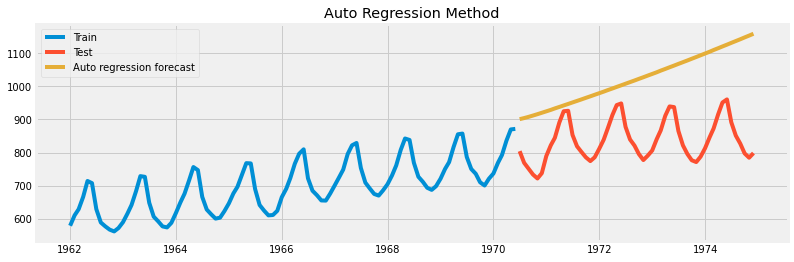

In [54]:
# Plot train, test and forecast

plt.figure(figsize=(12,4))
plt.plot(train['Temp'], label='Train')
plt.plot(test['Temp'], label='Test')
plt.plot(y_hat_ar['ar_forecast'][test.index.min():], label='Auto regression forecast')
plt.legend(loc='best')
plt.title('Auto Regression Method')
plt.show()

In [55]:
# Calculate RMSE and MAPE

rmse = np.sqrt(mean_squared_error(test['Temp'], y_hat_ar['ar_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Temp']-y_hat_ar['ar_forecast'][test.index.min():])/test['Temp'])*100,2)
r2 = r2_score(test['Temp'], y_hat_ar['ar_forecast'][test.index.min():])

tempResults = pd.DataFrame({'Method':['Autoregressive (AR) method'], 'R2': r2, 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'R2', 'RMSE', 'MAPE']]
results

,Method,R2,RMSE,MAPE
0,Naive method,-0.31293187,70.99000000,7.62000000
0,Simple average method,-4.97401973,151.44000000,16.06000000
0,Simple moving average forecast,-1.05728264,88.87000000,7.90000000
0,Simple exponential smoothing forecast,-0.31293187,70.99000000,7.62000000
0,Holt's exponential smoothing method,-1.56110686,99.15000000,10.69000000
0,Holt Winters' additive method,0.79740755,27.89000000,2.74000000
0,Holt Winters' multiplicative method,0.29077555,52.18000000,6.02000000
0,Autoregressive (AR) method,-9.98493960,205.35000000,22.79000000


Moving average method (MA)

In [ ]:
model = ARIMA(train_data_boxcox_diff, order=(1, 0, 0)) 
model_fit = model.fit()
print(model_fit.params)

const     0.00482114
ar.L1.y   0.62937430
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [ ]:
# Recover original time series

y_hat_ma = data_boxcox_diff.copy()
y_hat_ma['ma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox_diff'].cumsum()
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox'].add(data_boxcox[0])
y_hat_ma['ma_forecast'] = np.exp(y_hat_ma['ma_forecast_boxcox'])

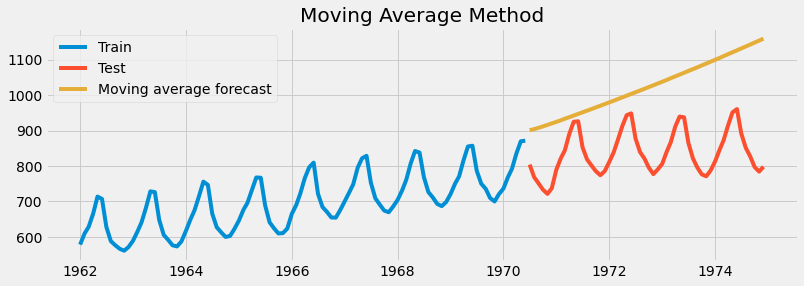

In [ ]:
# Plot train, test and forecast

plt.figure(figsize=(12,4))
plt.plot(df['Temp'][:train_len], label='Train')
plt.plot(df['Temp'][train_len:], label='Test')
plt.plot(y_hat_ma['ma_forecast'][test.index.min():], label='Moving average forecast')
plt.legend(loc='best')
plt.title('Moving Average Method')
plt.show()

In [ ]:
# Calculate RMSE and MAPE

rmse = np.sqrt(mean_squared_error(test['Temp'], y_hat_ma['ma_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Temp']-y_hat_ma['ma_forecast'][test.index.min():])/test['Temp'])*100,2)
r2 = r2_score(test['Temp'], y_hat_ma['ma_forecast'][test.index.min():])

tempResults = pd.DataFrame({'Method':['Moving Average (MA) method'], 'R2':r2, 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'R2', 'RMSE', 'MAPE']]
results

,Method,R2,RMSE,MAPE
0,Naive method,-0.31293187,70.99000000,7.62000000
0,Simple average method,-4.97401973,151.44000000,16.06000000
0,Simple moving average forecast,-1.05728264,88.87000000,7.90000000
0,Simple exponential smoothing forecast,-0.31293187,70.99000000,7.62000000
0,Holt's exponential smoothing method,-1.56110686,99.15000000,10.69000000
0,Holt Winters' additive method,0.79740755,27.89000000,2.74000000
0,Holt Winters' multiplicative method,0.29077555,52.18000000,6.02000000
0,Autoregressive (AR) method,-9.98493960,205.35000000,22.79000000
0,Autoregressive (AR) method,-9.98493960,205.35000000,22.79000000
0,Moving Average (MA) method,-9.98493960,205.35000000,22.79000000


Auto regression moving average method (ARMA)


In [ ]:
model = ARIMA(train_data_boxcox_diff, order=(1, 0, 0))
model_fit = model.fit()
print(model_fit.params)

const     0.00482114
ar.L1.y   0.62937430
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [ ]:
# Recover original time series

y_hat_arma = data_boxcox_diff.copy()
y_hat_arma['arma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox_diff'].cumsum()
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox'].add(data_boxcox[0])
y_hat_arma['arma_forecast'] = np.exp(y_hat_arma['arma_forecast_boxcox'])

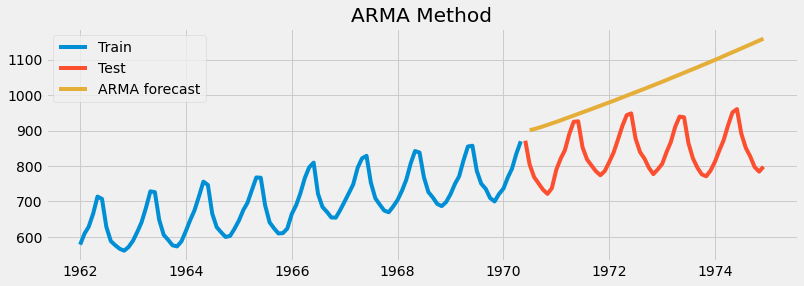

In [ ]:

plt.figure(figsize=(12,4))
plt.plot( df['Temp'][:train_len-1], label='Train')
plt.plot(df['Temp'][train_len-1:], label='Test')
plt.plot(y_hat_arma['arma_forecast'][test.index.min():], label='ARMA forecast')
plt.legend(loc='best')
plt.title('ARMA Method')
plt.show()

In [ ]:
# Calculate RMSE and MAPE

rmse = np.sqrt(mean_squared_error(test['Temp'], y_hat_arma['arma_forecast'][train_len-1:])).round(2)
mape = np.round(np.mean(np.abs(test['Temp']-y_hat_arma['arma_forecast'][train_len-1:])/test['Temp'])*100,2)
r2 = r2_score(test['Temp'], y_hat_arma['arma_forecast'][train_len-1:])

tempResults = pd.DataFrame({'Method':['Autoregressive moving average (ARMA) method'], 'R2': r2, 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'R2', 'RMSE', 'MAPE']]
results

,Method,R2,RMSE,MAPE
0,Naive method,-0.31293187,70.99000000,7.62000000
0,Simple average method,-4.97401973,151.44000000,16.06000000
0,Simple moving average forecast,-1.05728264,88.87000000,7.90000000
0,Simple exponential smoothing forecast,-0.31293187,70.99000000,7.62000000
0,Holt's exponential smoothing method,-1.56110686,99.15000000,10.69000000
0,Holt Winters' additive method,0.79740755,27.89000000,2.74000000
0,Holt Winters' multiplicative method,0.29077555,52.18000000,6.02000000
0,Autoregressive (AR) method,-9.98493960,205.35000000,22.79000000
0,Autoregressive (AR) method,-9.98493960,205.35000000,22.79000000
0,Moving Average (MA) method,-9.98493960,205.35000000,22.79000000


Auto regressive integrated moving average (ARIMA)


In [ ]:
model = ARIMA(train_data_boxcox, order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.params)

const       0.00454061
ar.L1.D.y   0.40309617
ma.L1.D.y   0.46136818
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [ ]:
# Recover original time series forecast

y_hat_arima = data_boxcox_diff.copy()
y_hat_arima['arima_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox_diff'].cumsum()
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox'].add(data_boxcox[0])
y_hat_arima['arima_forecast'] = np.exp(y_hat_arima['arima_forecast_boxcox'])

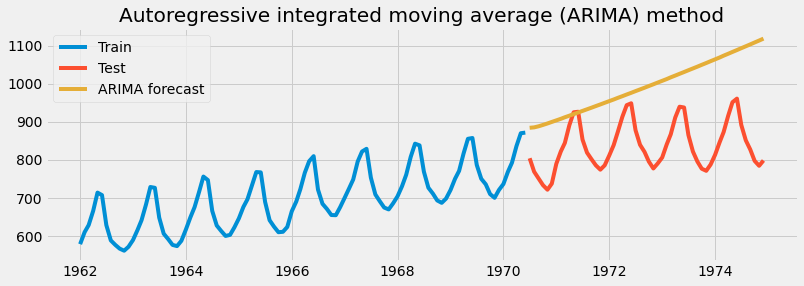

In [ ]:
# Plot train, test and forecast

plt.figure(figsize=(12,4))
plt.plot(train['Temp'], label='Train')
plt.plot(test['Temp'], label='Test')
plt.plot(y_hat_arima['arima_forecast'][test.index.min():], label='ARIMA forecast')
plt.legend(loc='best')
plt.title('Autoregressive integrated moving average (ARIMA) method')
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(test['Temp'], y_hat_arima['arima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Temp']-y_hat_arima['arima_forecast'][test.index.min():])/test['Temp'])*100,2)
r2 = r2_score(test['Temp'], y_hat_arima['arima_forecast'][test.index.min():])

tempResults = pd.DataFrame({'Method':['Autoregressive integrated moving average (ARIMA) method'], 'R2': r2, 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'R2', 'RMSE', 'MAPE']]
results

,Method,R2,RMSE,MAPE
0,Naive method,-0.31293187,70.99000000,7.62000000
0,Simple average method,-4.97401973,151.44000000,16.06000000
0,Simple moving average forecast,-1.05728264,88.87000000,7.90000000
0,Simple exponential smoothing forecast,-0.31293187,70.99000000,7.62000000
0,Holt's exponential smoothing method,-1.56110686,99.15000000,10.69000000
0,Holt Winters' additive method,0.79740755,27.89000000,2.74000000
0,Holt Winters' multiplicative method,0.29077555,52.18000000,6.02000000
0,Autoregressive (AR) method,-9.98493960,205.35000000,22.79000000
0,Autoregressive (AR) method,-9.98493960,205.35000000,22.79000000
0,Moving Average (MA) method,-9.98493960,205.35000000,22.79000000


Seasonal auto regressive integrated moving average (SARIMA)


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train_data_boxcox, order=(1, 1, 1), seasonal_order=(1, 1, 1, 52)) 
model_fit = model.fit()
print(model_fit.params)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ar.L1      -0.56746967
ma.L1       0.44728649
ar.S.L12   -0.44934921
ma.S.L12    0.07810960
sigma2      0.00007037
dtype: float64


In [ ]:

y_hat_sarima = data_boxcox_diff.copy()
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])

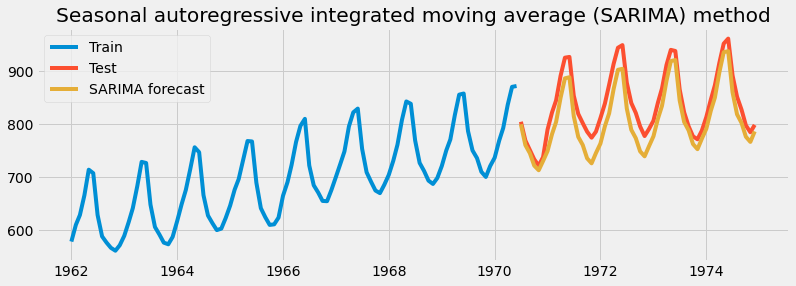

In [ ]:

plt.figure(figsize=(12,4))
plt.plot(train['Temp'], label='Train')
plt.plot(test['Temp'], label='Test')
plt.plot(y_hat_sarima['sarima_forecast'][test.index.min():], label='SARIMA forecast')
plt.legend(loc='best')
plt.title('Seasonal autoregressive integrated moving average (SARIMA) method')
plt.show()

In [ ]:
# Calculate RMSE and MAPE

rmse = np.sqrt(mean_squared_error(test['Temp'], y_hat_sarima['sarima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Temp']-y_hat_sarima['sarima_forecast'][test.index.min():])/test['Temp'])*100,2)
r2 = r2_score(test['Temp'], y_hat_sarima['sarima_forecast'][test.index.min():])

tempResults = pd.DataFrame({'Method':['Seasonal autoregressive integrated moving average (SARIMA) method'], 'R2':r2, 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'R2', 'RMSE', 'MAPE']]
results

,Method,R2,RMSE,MAPE
0,Naive method,-0.31293187,70.99000000,7.62000000
0,Simple average method,-4.97401973,151.44000000,16.06000000
0,Simple moving average forecast,-1.05728264,88.87000000,7.90000000
0,Simple exponential smoothing forecast,-0.31293187,70.99000000,7.62000000
0,Holt's exponential smoothing method,-1.56110686,99.15000000,10.69000000
0,Holt Winters' additive method,0.79740755,27.89000000,2.74000000
0,Holt Winters' multiplicative method,0.29077555,52.18000000,6.02000000
0,Autoregressive (AR) method,-9.98493960,205.35000000,22.79000000
0,Autoregressive (AR) method,-9.98493960,205.35000000,22.79000000
0,Moving Average (MA) method,-9.98493960,205.35000000,22.79000000


In [ ]:
results.sort_values('R2', ascending=False)

,Method,R2,RMSE,MAPE
0,Holt Winters' additive method,0.79740755,27.89000000,2.74000000
0,Seasonal autoregressive integrated moving aver...,0.71570438,33.04000000,3.55000000
0,Holt Winters' multiplicative method,0.29077555,52.18000000,6.02000000
0,Naive method,-0.31293187,70.99000000,7.62000000
0,Simple exponential smoothing forecast,-0.31293187,70.99000000,7.62000000
0,Simple moving average forecast,-1.05728264,88.87000000,7.90000000
0,Holt's exponential smoothing method,-1.56110686,99.15000000,10.69000000
0,Simple average method,-4.97401973,151.44000000,16.06000000
0,Autoregressive integrated moving average (ARIM...,-7.16896546,177.08000000,19.33000000
0,Autoregressive (AR) method,-9.98493960,205.35000000,22.79000000


In [27]:
df

,Temp
Date,
1962-01-01,578.3
1962-02-01,609.8
1962-03-01,628.4
1962-04-01,665.6
1962-05-01,713.8
1962-06-01,707.2
1962-07-01,628.4
1962-08-01,588.1
1962-09-01,576.3


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 156 entries, 1962-01-01 to 1974-12-01
Data columns (total 1 columns):
Temp    156 non-null float64
dtypes: float64(1)
memory usage: 2.4 KB


In [1]:
!pip install stumpy

In [11]:
import pandas as pd
import stumpy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from matplotlib.patches import Rectangle
import datetime as dt

In [12]:
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv')
df['timestamp'] = pd.to_datetime(df['Month'])
df['Temp'] = df['Sunspots']
df.drop(['Sunspots', 'Month'], axis=1, inplace=True)
df

,timestamp,Temp
0,1749-01-01,58.0
1,1749-02-01,62.6
2,1749-03-01,70.0
3,1749-04-01,55.7
4,1749-05-01,85.0
...,...,...
2815,1983-08-01,71.8
2816,1983-09-01,50.3
2817,1983-10-01,55.8
2818,1983-11-01,33.3


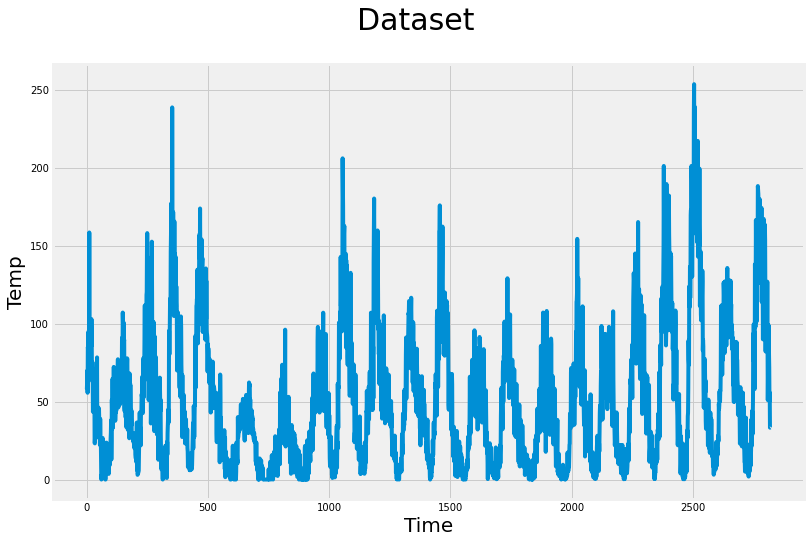

In [13]:
plt.suptitle('Dataset', fontsize='30')
plt.xlabel('Time', fontsize ='20')
plt.ylabel('Temp', fontsize='20')
plt.plot(df['Temp'].values)

In [14]:
m = 1000
mp = stumpy.stump(df['Temp'], m)

In [15]:
motif_idx = np.argsort(mp[:, 0])[0]
print(f"The motif is located at index {motif_idx}")

The motif is located at index 1235


In [16]:
nearest_neighbor_idx = mp[motif_idx, 1]

print(f"The nearest neighbor is located at index {nearest_neighbor_idx}")

The nearest neighbor is located at index 963


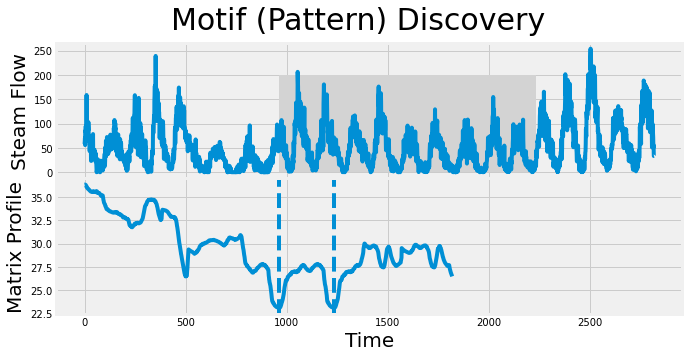

In [17]:
fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0},figsize=(10,5))
plt.suptitle('Motif (Pattern) Discovery', fontsize='30')

axs[0].plot(df['Temp'].values)
axs[0].set_ylabel('Steam Flow', fontsize='20')
rect = Rectangle((motif_idx, 0), m, 200, facecolor='lightgrey')
axs[0].add_patch(rect)
rect = Rectangle((nearest_neighbor_idx, 0), m, 200, facecolor='lightgrey')
axs[0].add_patch(rect)
axs[1].set_xlabel('Time', fontsize ='20')
axs[1].set_ylabel('Matrix Profile', fontsize='20')
axs[1].axvline(x=motif_idx, linestyle="dashed")
axs[1].axvline(x=nearest_neighbor_idx, linestyle="dashed")
axs[1].plot(mp[:, 0])
plt.show()

Find anomalies using stump

In [18]:
discord_idx = np.argsort(mp[:, 0])[-1]

print(f"The discord is located at index {discord_idx}")

The discord is located at index 1


In [19]:
nearest_neighbor_distance = mp[discord_idx, 0]

print(f"The nearest neighbor subsequence to this discord is {nearest_neighbor_distance} units away")

The nearest neighbor subsequence to this discord is 36.35376236027731 units away


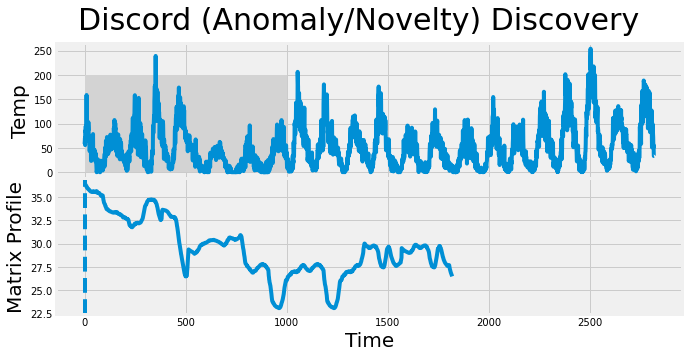

In [20]:
fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0}, figsize=(10,5))
plt.suptitle('Discord (Anomaly/Novelty) Discovery', fontsize='30')

axs[0].plot(df['Temp'].values)
axs[0].set_ylabel('Temp', fontsize='20')
rect = Rectangle((discord_idx, 0), m, 200, facecolor='lightgrey')
axs[0].add_patch(rect)
axs[1].set_xlabel('Time', fontsize ='20')
axs[1].set_ylabel('Matrix Profile', fontsize='20')
axs[1].axvline(x=discord_idx, linestyle="dashed")
axs[1].plot(mp[:, 0])
plt.show()

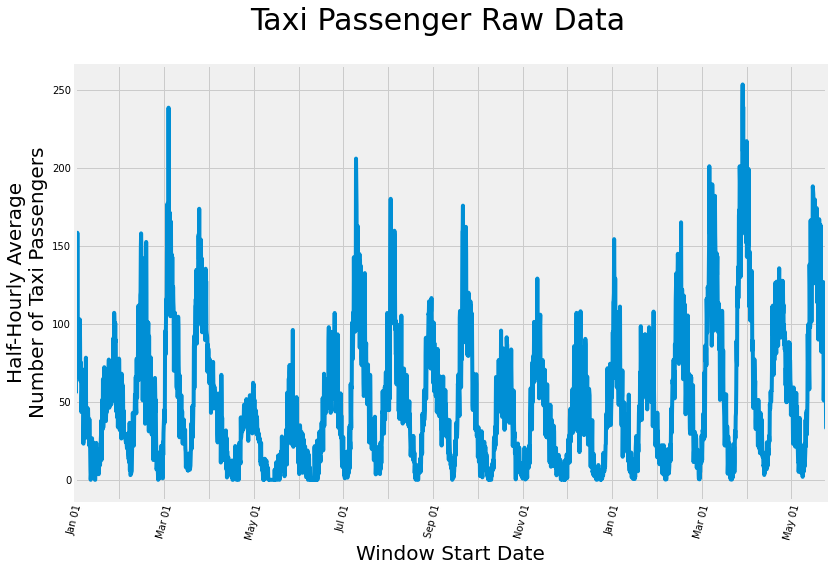

In [21]:
# This code is going to be utilized to control the axis labeling of the plots
DAY_MULTIPLIER = 7  # Specify for the amount of days you want between each labeled x-axis tick

x_axis_labels = df[(df.timestamp.dt.hour==0)]['timestamp'].dt.strftime('%b %d').values[::DAY_MULTIPLIER]
x_axis_labels[1::2] = " "
x_axis_labels, DAY_MULTIPLIER

plt.suptitle('Taxi Passenger Raw Data', fontsize='30')
plt.xlabel('Window Start Date', fontsize ='20')
plt.ylabel('Half-Hourly Average\nNumber of Taxi Passengers', fontsize='20')
plt.plot(df['Temp'])

plt.xticks(np.arange(0, df['Temp'].shape[0], (48*DAY_MULTIPLIER)/2), x_axis_labels)
plt.xticks(rotation=75)
plt.minorticks_on()
plt.margins(x=0)
plt.show()

In [22]:
days_dict ={
  "Half-Day": 24,
  "1-Day": 48,
  "2-Days": 96,
  "5-Days": 240,
  "7-Days": 336,
}

days_df = pd.DataFrame.from_dict(days_dict, orient='index', columns=['m'])
days_df.head()

,m
Half-Day,24
1-Day,48
2-Days,96
5-Days,240
7-Days,336


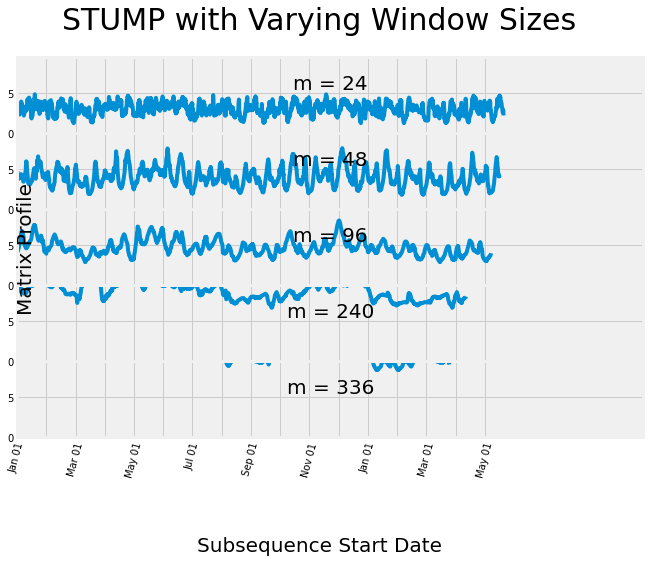

In [23]:
fig, axs = plt.subplots(5, sharex=True, gridspec_kw={'hspace': 0}, figsize=(10,7))
fig.text(0.5, -0.1, 'Subsequence Start Date', ha='center', fontsize='20')
fig.text(0.08, 0.5, 'Matrix Profile', va='center', rotation='vertical', fontsize='20')
for i, varying_m in enumerate(days_df['m'].values):
    mp = stumpy.stump(df['Temp'], varying_m)
    axs[i].plot(mp[:, 0])
    axs[i].set_ylim(0,9.5)
    axs[i].set_xlim(0,3600)
    title = f"m = {varying_m}"
    axs[i].set_title(title, fontsize=20, y=.5)
plt.xticks(np.arange(0, df.shape[0], (48*DAY_MULTIPLIER)/2), x_axis_labels)
plt.xticks(rotation=75)
plt.suptitle('STUMP with Varying Window Sizes', fontsize='30')
plt.show()

In [24]:
df

,timestamp,Temp
0,1749-01-01,58.0
1,1749-02-01,62.6
2,1749-03-01,70.0
3,1749-04-01,55.7
4,1749-05-01,85.0
...,...,...
2815,1983-08-01,71.8
2816,1983-09-01,50.3
2817,1983-10-01,55.8
2818,1983-11-01,33.3


In [25]:
!pip install -q ruptures

In [26]:
!pip install -q EIA-python

In [27]:
!pip install -q changefinder

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import eia
import changefinder
import ruptures as rpt

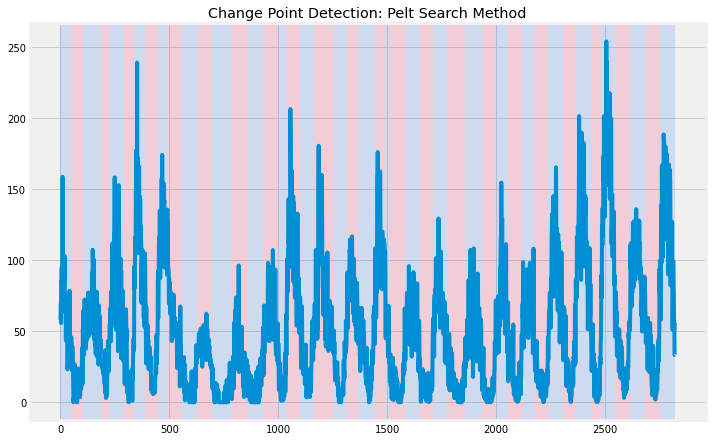

In [29]:
#Convert the time series values to a numpy 1D array
points=np.array(df['Temp'])

#RUPTURES PACKAGE
#Changepoint detection with the Pelt search method
model="rbf"
algo = rpt.Pelt(model=model).fit(points)
result = algo.predict(pen=10)
rpt.display(points, result, figsize=(10, 6))
plt.title('Change Point Detection: Pelt Search Method')
plt.show()

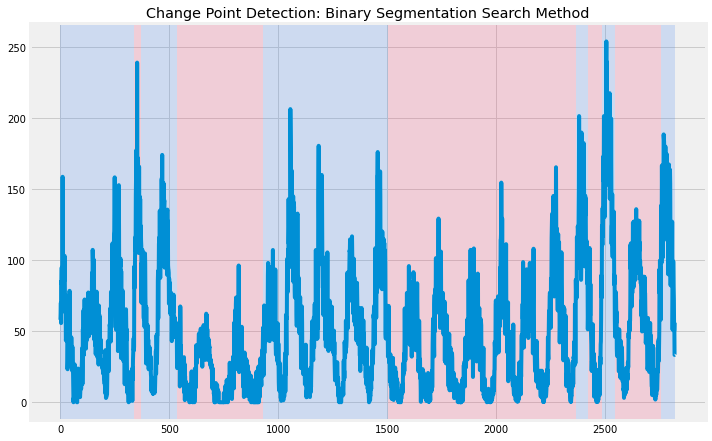

In [30]:
#Changepoint detection with the Binary Segmentation search method
model = "l2"  
algo = rpt.Binseg(model=model).fit(points)
my_bkps = algo.predict(n_bkps=10)
# show results
rpt.show.display(points, my_bkps, figsize=(10, 6))
plt.title('Change Point Detection: Binary Segmentation Search Method')
plt.show()

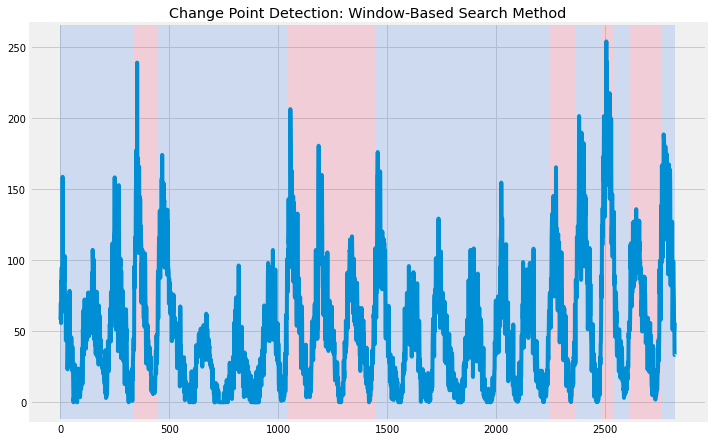

In [31]:
#Changepoint detection with window-based search method
model = "l2"  
algo = rpt.Window(width=40, model=model).fit(points)
my_bkps = algo.predict(n_bkps=10)
rpt.show.display(points, my_bkps, figsize=(10, 6))
plt.title('Change Point Detection: Window-Based Search Method')
plt.show()

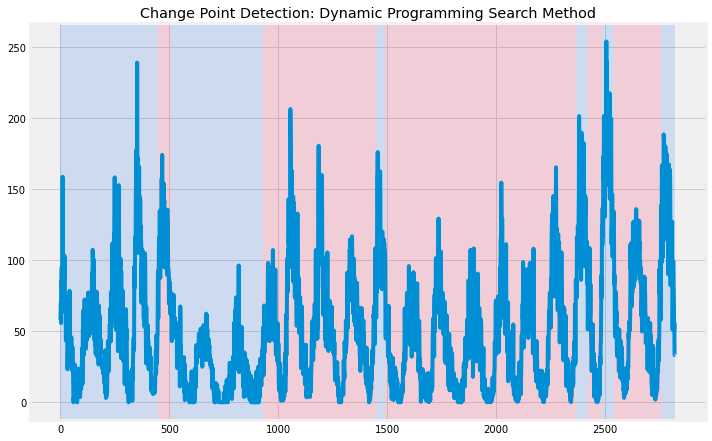

In [32]:
#Changepoint detection with dynamic programming search method
model = "l1"  
algo = rpt.Dynp(model=model, min_size=3, jump=5).fit(points)
my_bkps = algo.predict(n_bkps=10)
rpt.show.display(points, my_bkps, figsize=(10, 6))
plt.title('Change Point Detection: Dynamic Programming Search Method')
plt.show()

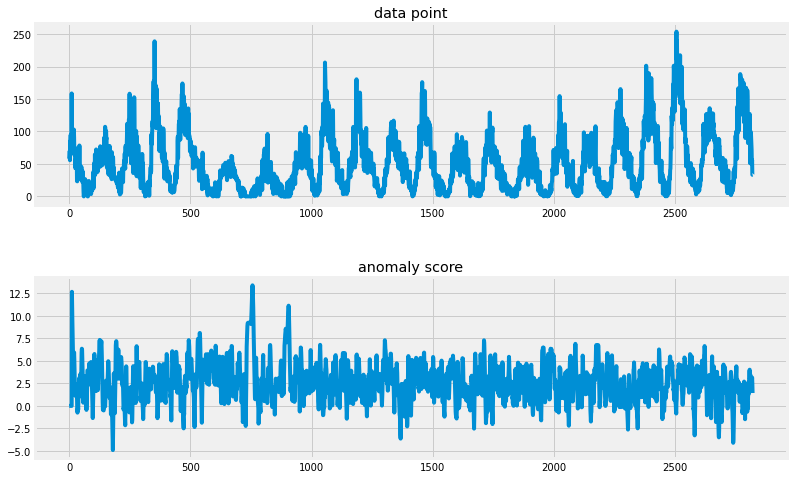

In [33]:
#CHANGEFINDER PACKAGE
f, (ax1, ax2) = plt.subplots(2, 1)
f.subplots_adjust(hspace=0.4)
ax1.plot(points)
ax1.set_title("data point")
#Initiate changefinder function
cf = changefinder.ChangeFinder()
scores = [cf.update(p) for p in points]
ax2.plot(scores)
ax2.set_title("anomaly score")
plt.show()

Kat's Library

In [66]:
!pip install -q kats

     |████████████████████████████████| 6.3 MB 4.7 MB/s 
     |████████████████████████████████| 934 kB 25.1 MB/s 
     |████████████████████████████████| 64 kB 1.6 MB/s 
     |████████████████████████████████| 310 kB 37.0 MB/s 
     |████████████████████████████████| 3.3 MB 47.5 MB/s 
     |████████████████████████████████| 9.8 MB 35.0 MB/s 
     |████████████████████████████████| 34.5 MB 7.1 kB/s 
     |████████████████████████████████| 325 kB 66.3 MB/s 


In [34]:
df

,timestamp,Temp
0,1749-01-01,58.0
1,1749-02-01,62.6
2,1749-03-01,70.0
3,1749-04-01,55.7
4,1749-05-01,85.0
...,...,...
2815,1983-08-01,71.8
2816,1983-09-01,50.3
2817,1983-10-01,55.8
2818,1983-11-01,33.3


In [35]:
df = df.rename(columns={"timestamp": "time", "Temp": "value"})

In [70]:
!pip install -q statsmodels==0.12.1

     |████████████████████████████████| 9.5 MB 5.0 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
kats 0.1.0 requires statsmodels>=0.12.2, but you have statsmodels 0.12.1 which is incompatible.


In [74]:
! pip install --upgrade statsmodels

  Using cached statsmodels-0.13.2-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.8 MB)
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.1
    Uninstalling statsmodels-0.12.1:
      Successfully uninstalled statsmodels-0.12.1


In [36]:
from kats.consts import TimeSeriesData
ts = TimeSeriesData(df)
ts

,time,value
0,1749-01-01,58.0
1,1749-02-01,62.6
2,1749-03-01,70.0
3,1749-04-01,55.7
4,1749-05-01,85.0
...,...,...
2815,1983-08-01,71.8
2816,1983-09-01,50.3
2817,1983-10-01,55.8
2818,1983-11-01,33.3


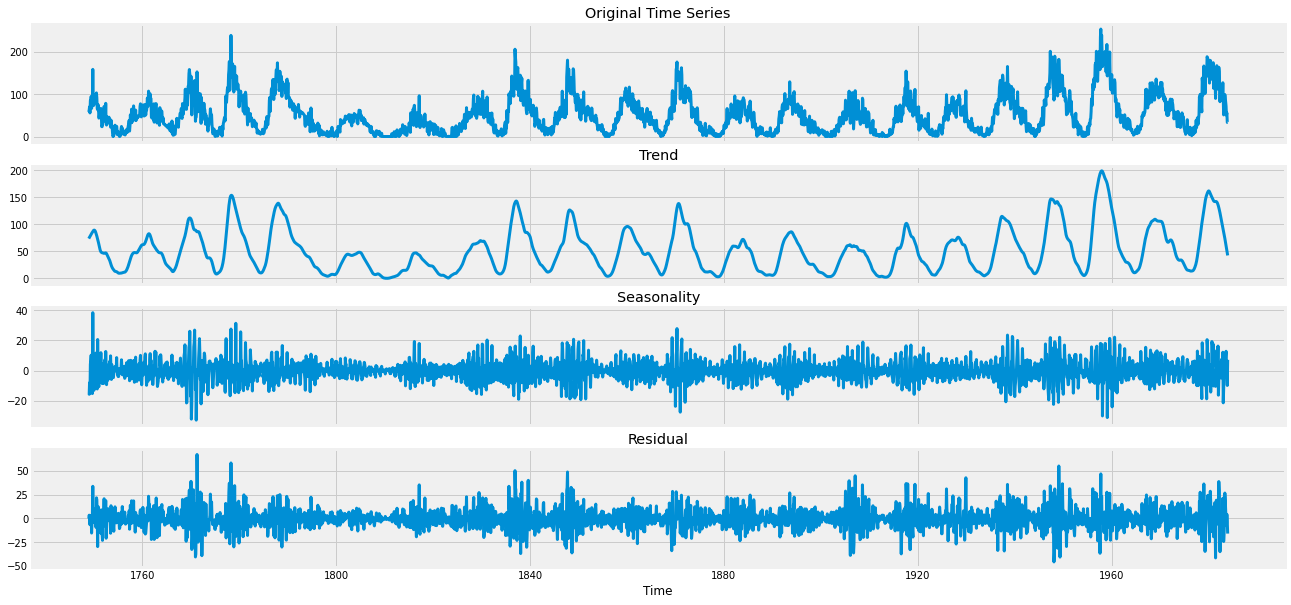

In [37]:
from kats.utils.decomposition import TimeSeriesDecomposition

decomposer = TimeSeriesDecomposition(ts, decomposition="additive")
results = decomposer.decomposer()
fig = decomposer.plot()

In [41]:
from kats.detectors.cusum_detection import CUSUMDetector

cumsum_detector = CUSUMDetector(ts)
changepoints = cumsum_detector.detector()
print(changepoints[0][0])

[]


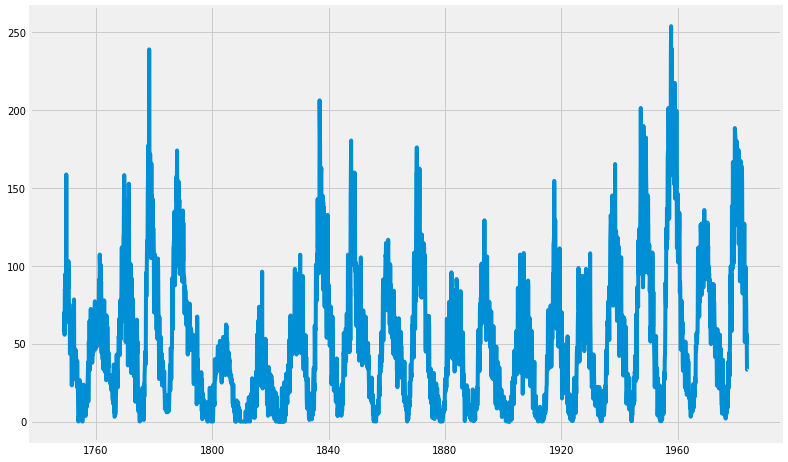

In [42]:
cumsum_detector.plot(changepoints)


Detect Sudden Changes

In [43]:
from kats.detectors.bocpd import BOCPDetector, BOCPDModelType, TrendChangeParameters

bocpd_detector = BOCPDetector(ts)

changepoints = bocpd_detector.detector(
    model=BOCPDModelType.NORMAL_KNOWN_MODEL, changepoint_prior=0.01
)
for changepoint in changepoints:
    print(changepoint[0])

/usr/local/lib/python3.7/dist-packages/ax/core/parameter.py:468: UserWarning:

`sort_values` is not specified for `ChoiceParameter` "known_prec_multiplier". Defaulting to `True` for parameters of `ParameterType` FLOAT. To override this behavior (or avoid this warning), specify `sort_values` during `ChoiceParameter` construction.

/usr/local/lib/python3.7/dist-packages/ax/core/parameter.py:468: UserWarning:

`sort_values` is not specified for `ChoiceParameter` "cp_prior". Defaulting to `True` for parameters of `ParameterType` FLOAT. To override this behavior (or avoid this warning), specify `sort_values` during `ChoiceParameter` construction.



TimeSeriesChangePoint(start_time: 1761-11-01T00:00:00.000000000, end_time: 1761-11-01T00:00:00.000000000, confidence: 0.7070334478686038)
TimeSeriesChangePoint(start_time: 1763-01-01T00:00:00.000000000, end_time: 1763-01-01T00:00:00.000000000, confidence: 0.52697402147692)
TimeSeriesChangePoint(start_time: 1769-07-01T00:00:00.000000000, end_time: 1769-07-01T00:00:00.000000000, confidence: 0.5436898580455082)
TimeSeriesChangePoint(start_time: 1770-03-01T00:00:00.000000000, end_time: 1770-03-01T00:00:00.000000000, confidence: 0.8635875833606675)
TimeSeriesChangePoint(start_time: 1770-12-01T00:00:00.000000000, end_time: 1770-12-01T00:00:00.000000000, confidence: 0.9413253575791087)
TimeSeriesChangePoint(start_time: 1771-04-01T00:00:00.000000000, end_time: 1771-04-01T00:00:00.000000000, confidence: 0.9334157752828021)
TimeSeriesChangePoint(start_time: 1772-02-01T00:00:00.000000000, end_time: 1772-02-01T00:00:00.000000000, confidence: 0.8016931736246695)
TimeSeriesChangePoint(start_time: 17

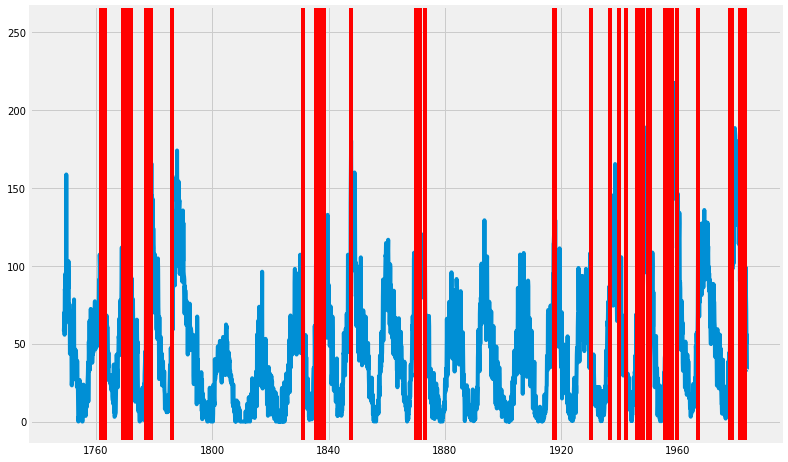

In [44]:
bocpd_detector.plot(changepoints)

Outlier Detection

In [45]:
from kats.detectors.outlier import OutlierDetector

outlier_detector = OutlierDetector(ts, "additive")

In [46]:
outlier_detector.detector()
outliers = outlier_detector.outliers
outliers

[[Timestamp('1749-11-01 00:00:00'),
  Timestamp('1770-04-01 00:00:00'),
  Timestamp('1771-01-01 00:00:00'),
  Timestamp('1771-05-01 00:00:00'),
  Timestamp('1778-05-01 00:00:00'),
  Timestamp('1817-03-01 00:00:00'),
  Timestamp('1836-12-01 00:00:00'),
  Timestamp('1839-08-01 00:00:00'),
  Timestamp('1839-09-01 00:00:00'),
  Timestamp('1847-07-01 00:00:00'),
  Timestamp('1847-09-01 00:00:00'),
  Timestamp('1847-10-01 00:00:00'),
  Timestamp('1905-11-01 00:00:00'),
  Timestamp('1906-07-01 00:00:00'),
  Timestamp('1907-02-01 00:00:00'),
  Timestamp('1917-08-01 00:00:00'),
  Timestamp('1919-06-01 00:00:00'),
  Timestamp('1929-12-01 00:00:00'),
  Timestamp('1938-07-01 00:00:00'),
  Timestamp('1947-05-01 00:00:00'),
  Timestamp('1948-02-01 00:00:00'),
  Timestamp('1948-04-01 00:00:00'),
  Timestamp('1948-11-01 00:00:00'),
  Timestamp('1949-02-01 00:00:00'),
  Timestamp('1957-10-01 00:00:00'),
  Timestamp('1959-08-01 00:00:00'),
  Timestamp('1981-06-01 00:00:00')]]

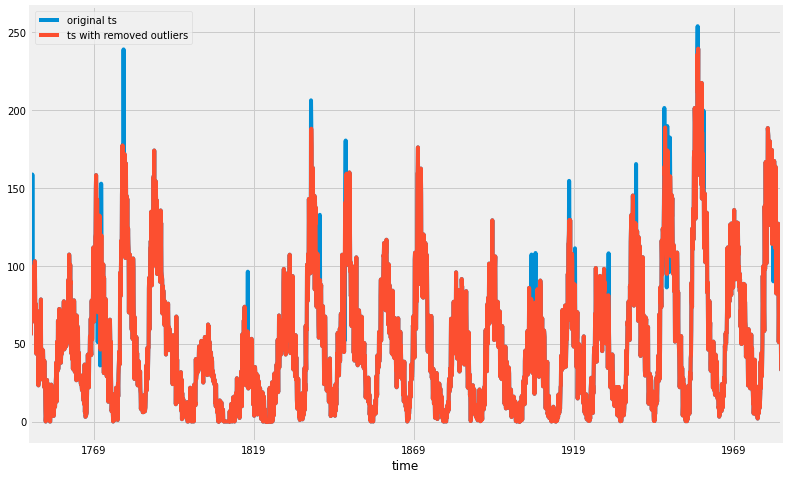

In [49]:
ts_day_outliers_interpolated = outlier_detector.remover(interpolate=True)
from matplotlib import pyplot as plt
ax = ts.to_dataframe().plot(x="time", y="value")
ts_day_outliers_interpolated.to_dataframe().plot(x="time", y="y_0", ax=ax)
plt.legend(labels=["original ts", "ts with removed outliers"])
plt.show()